In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df_can = pd.read_pickle('df_can.pickle')
df_can.head(1)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639


In [3]:
years = list(map(str, range(1980, 2014)))

# Styles

In [4]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

C:\Users\angol\AppData\Local\Temp/ipykernel_26296/2010260599.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5, 2), dpi=50)


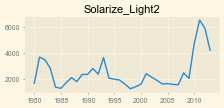

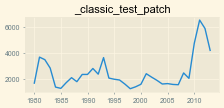

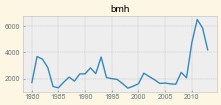

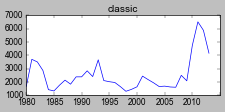

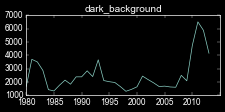

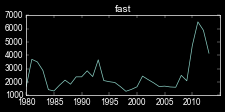

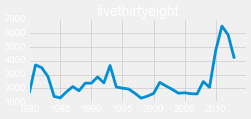

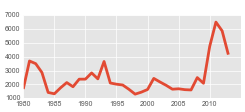

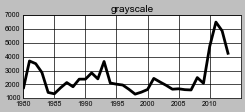

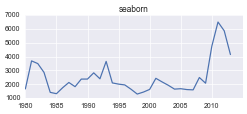

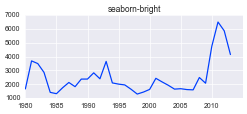

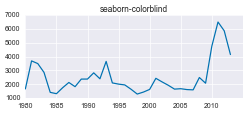

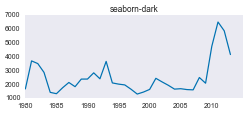

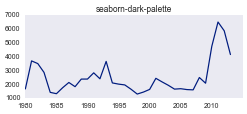

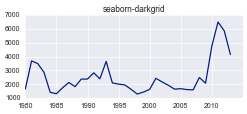

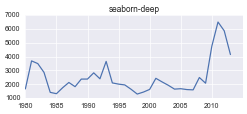

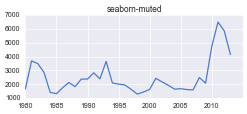

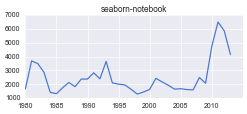

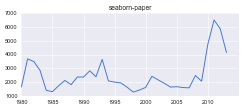

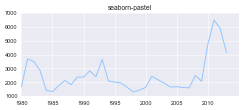

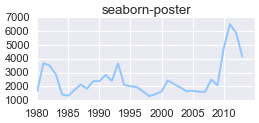

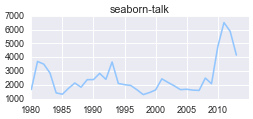

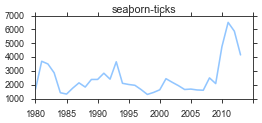

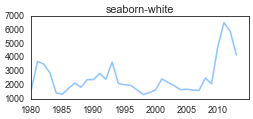

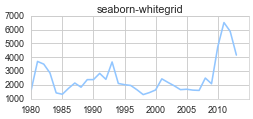

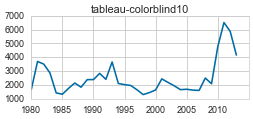

In [5]:
haiti = df_can.loc['Haiti', years]
for style in plt.style.available:
    mpl.style.use(style)
    plt.figure(figsize=(5, 2), dpi=50)
    haiti.plot()
    plt.title(style)

In [6]:
mpl.style.use('bmh')

# Colours

In [28]:
for name, hex in mpl.colors.cnames.items():
    print(name, hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


# Scripting vs artist layer 
scripting layer: pyplot \
artist layer: working with axes

Text(0.5, 0, 'Years')

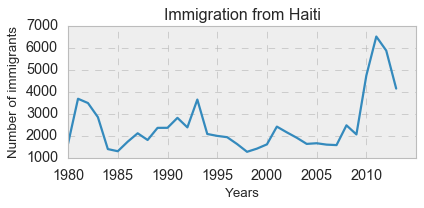

In [7]:
# scripting
haiti.plot(kind='line', figsize=(5, 2)) 
plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

Text(0.5, 0, 'Years')

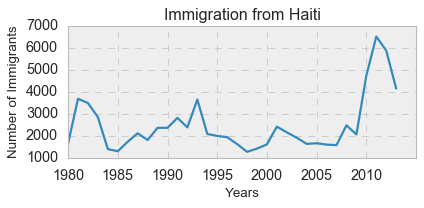

In [8]:
# artist
ax = haiti.plot(kind='line', figsize=(5, 2))
ax.set_title('Immigration from Haiti')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

# Plots from df
*   `bar` for vertical bar plots
*   `barh` for horizontal bar plots
*   `hist` for histogram
*   `box` for boxplot
*   `kde` or `density` for density plots
*   `area` for area plots
*   `pie` for pie plots
*   `scatter` for scatter plots
*   `hexbin` for hexbin plot

## Lineplots
Pandas plots indices on x-axis and columns as lines on y-axis

<AxesSubplot:>

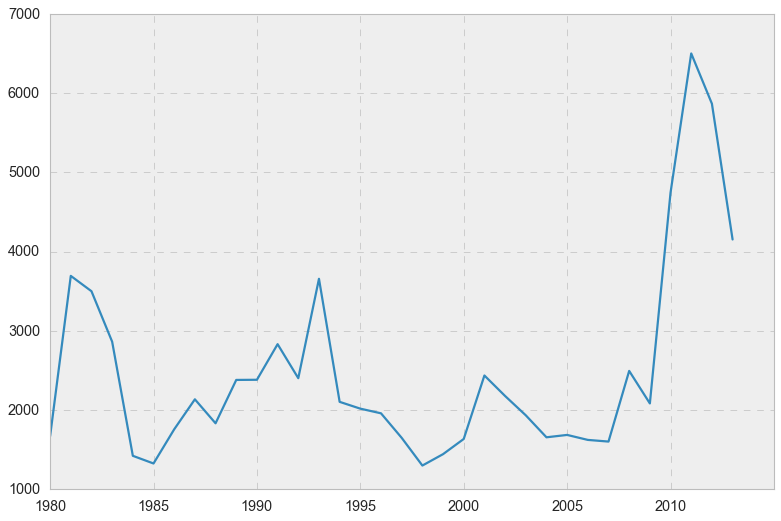

In [9]:
haiti = df_can.loc['Haiti', years] # Since its a single row, its returned as a series and can be plotted direclty (doesnt need transpose)
haiti.plot()

In [10]:
df_sorted = df_can.sort_values('Total', ascending=False) 
df_top5 = df_sorted.head(5) # need to transpose to plot
df_top5 = df_top5[years]
df_top5 = df_top5.transpose()
df_top5.head(10)

,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


<AxesSubplot:>

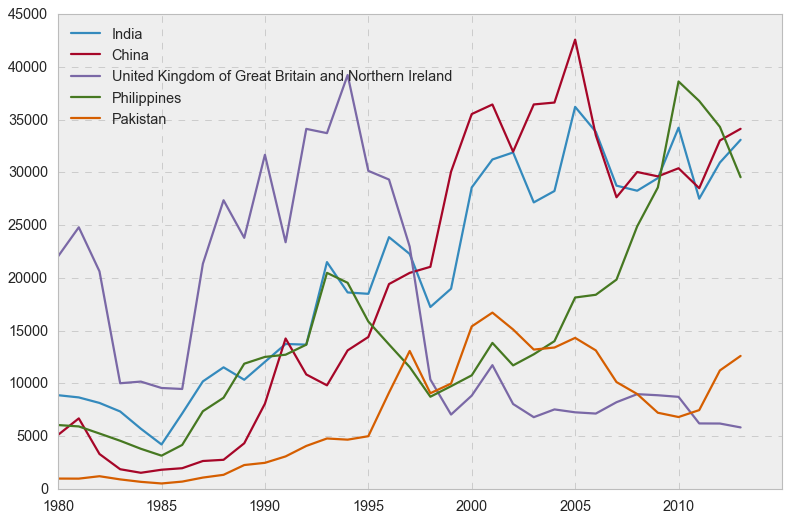

In [11]:
df_top5.plot(kind='line')

## Area plots 
cumulative/stacked line plot \
for stacked (default): each column bust be either all positive or all negative values \
otherwise do unstacked: set stacked to 0

### Stacked
Shows proportion that each country contributes to the total with the total being the height of the plot.

<AxesSubplot:>

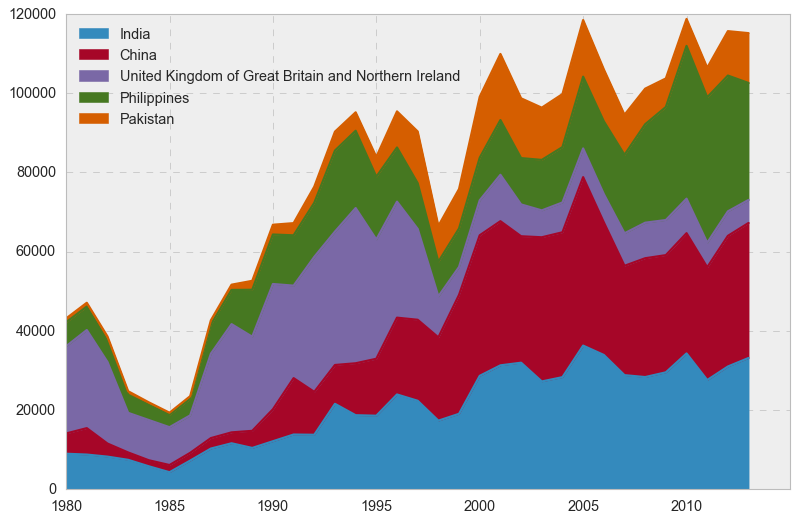

In [12]:
df_top5.plot(kind='area')

### Unstacked
Basically a line plot \
transparency: alpha 

<AxesSubplot:>

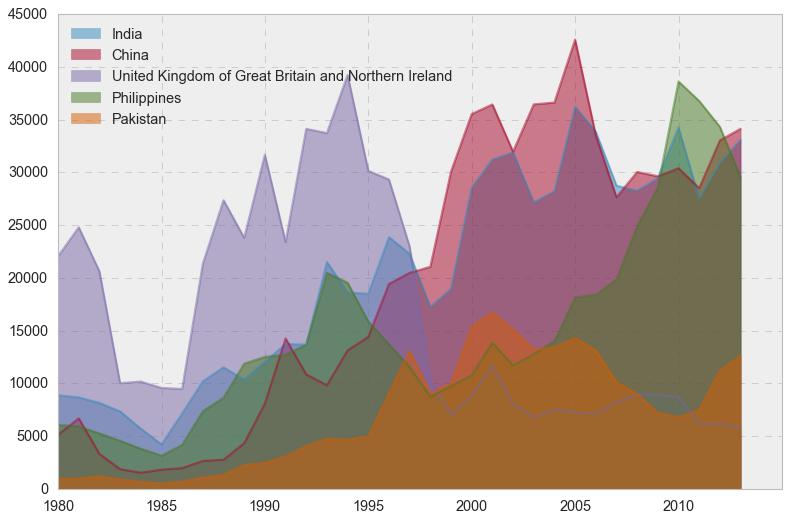

In [13]:
df_top5.plot(kind='area', stacked=False)

## Histograms
ensure alignment of bars with the bin labels for easy reding: use np.histogram function to get bin edges to pass into the plot function

Text(0.5, 0, 'Number of Immigrants')

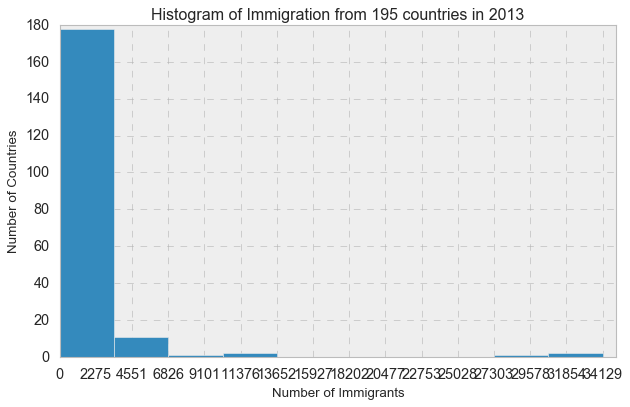

In [14]:
count, bin_edges = np.histogram(df_can['2013'], bins=15) # returns a list of frequencies and the bin boundaries/edges
df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)
plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

### Multiple histograms
Can also be stacked/unstacked

Text(0.5, 0, 'Number of Immigrants')

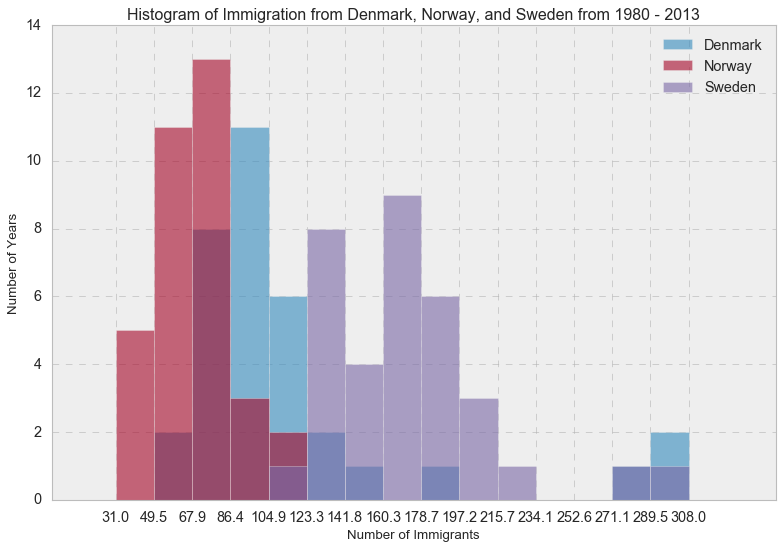

In [27]:
bins = 15
df_hist = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

count, bin_edges = np.histogram(df_hist, bins)
df_hist.plot(kind='hist', 
             bins=bins, 
             xticks=bin_edges, 
             alpha=0.6,)
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')


Text(0.5, 0, 'Number of Immigrants')

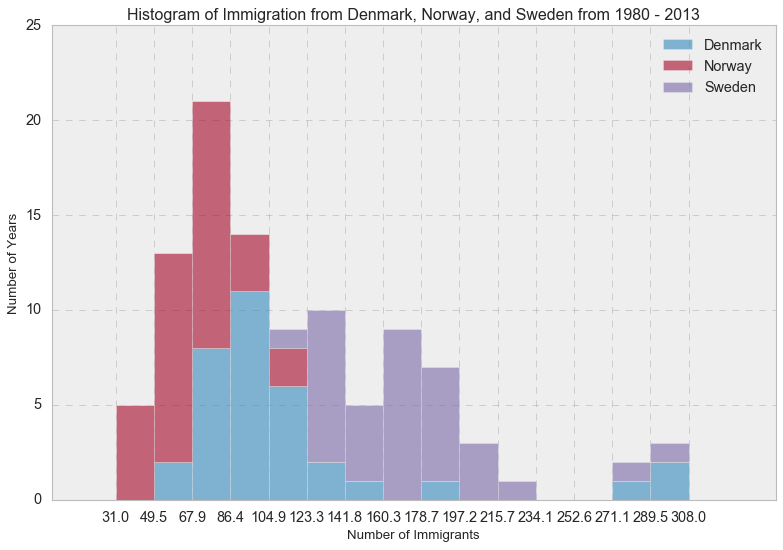

In [29]:
bins = 15
df_hist = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

count, bin_edges = np.histogram(df_hist, bins)
df_hist.plot(kind='hist', 
             bins=bins, 
             xticks=bin_edges, 
             alpha=0.6,
             stacked=True)
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')


## Bar plots
can creats horizontal bar graph with kind='barh'

Text(0.5, 1.0, 'Icelandic immigrants to Canada from 1980 to 2013')

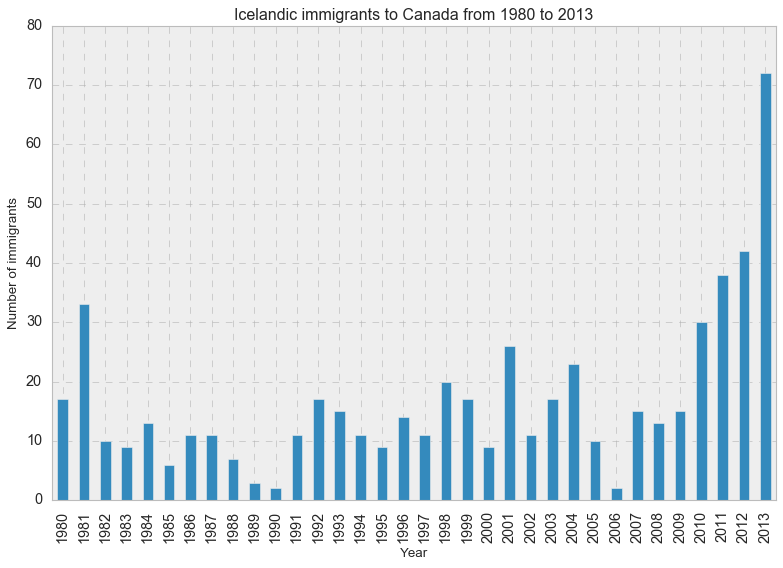

In [31]:
df_bar = df_can.loc['Iceland', years]
df_bar.plot(kind='bar')
plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot


# Text on plots
If x-axis is string, then use the index position number: plt.text(20, 6000, '2010 Earthquake') \
If x-axis is int, then use the actual value: plt.text(2010, 6000, '2010 Earthquake')

Text(25, 6000, '2010 Earthquake')

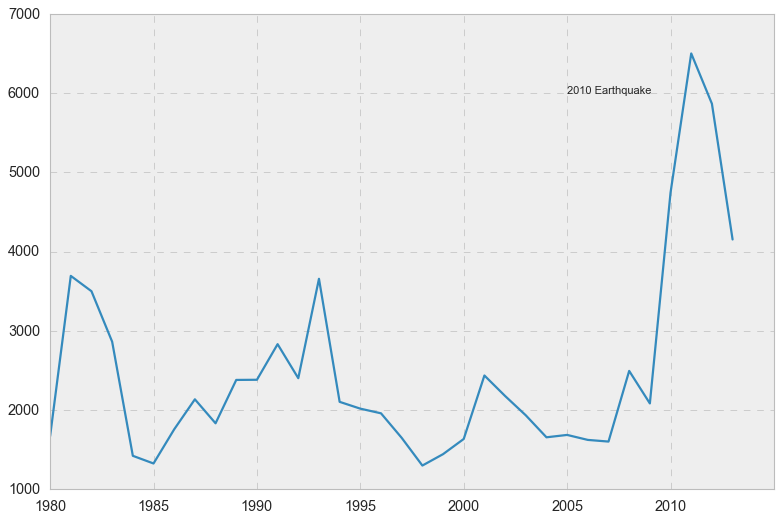

In [15]:
haiti.plot()
plt.text(25, 6000, '2010 Earthquake')

## Annotations
arguments: \
    s: annotation text    
    xy: tuple coords for arrow point
    xytext: tuple coords for text   
    xycoords: coordinate system, typically 'data'   
    arrowprops: dict of arrow properties 
        dict(arrowstyle='->'       
             connectionstyle=arc3             
             color=..         
             lw=..)
 
for a text annotation: \
rotation
va: vertical alignment
ha: horizontal alignment


Text(25, 3000, '2005 - 2010 Crisis')

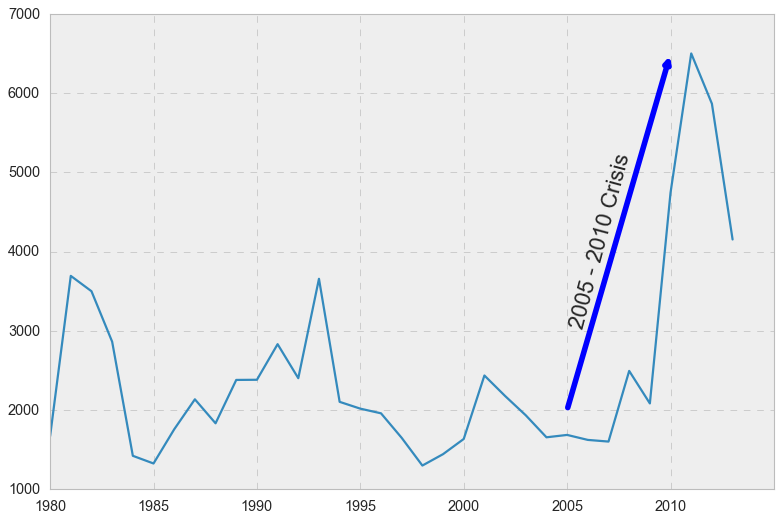

In [70]:
haiti.plot()
plt.annotate('',
             xy=(30, 6500),
             xytext=(25, 2000),
             xycoords='data',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle='arc3',
                             color='blue', lw=5))

plt.annotate('2005 - 2010 Crisis',
             xy=(25, 3000),
             rotation=75,
             va='bottom',
             fontsize=20)